In [35]:
import pandas as pd

Edit this to read the file wanted:

In [36]:

filename = "selected_features_dyn.csv" # Add filename

data = pd.read_csv(filename)

Random Forest Model:

Training Fold: 
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 
---------------- Random Forest ----------------
Root Mean Squared Error:  12.266528795808048


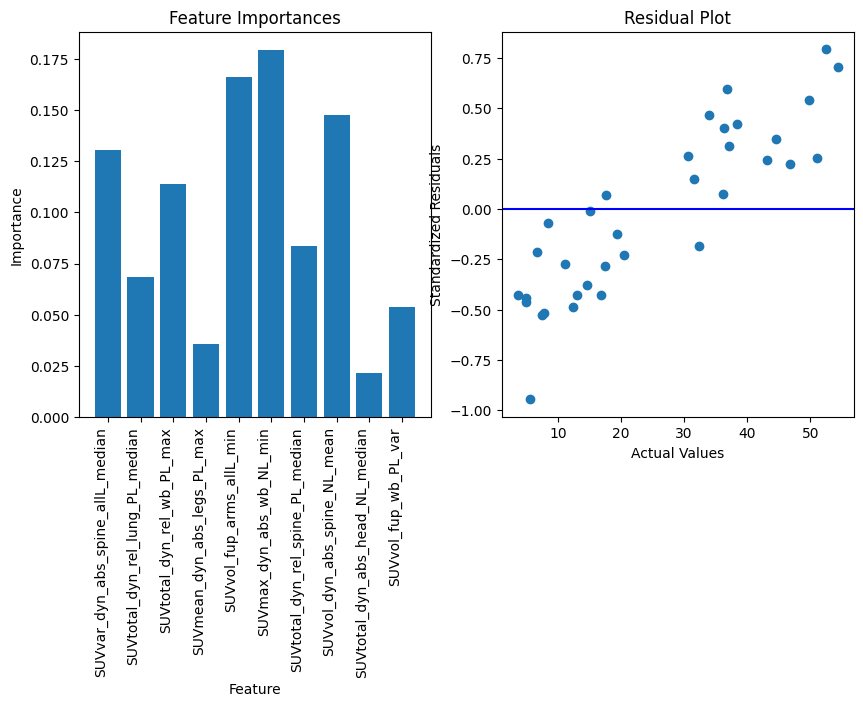

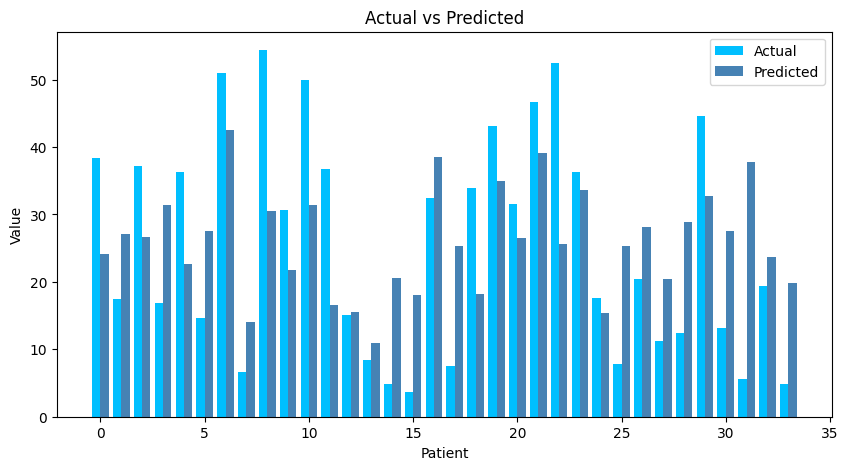

In [72]:
%run RF.py 

RF(data)

LightGBM

In [74]:
%run LightGBM.py 
# add your number of trails for optuna. longer trials -> better parameters, but longer runtime
n_trails = 5
lightGBMLOOOptuna(data, n_trails)

[I 2023-04-06 09:31:32,160] A new study created in memory with name: no-name-6b09c7f7-dc34-41a5-a5ee-5384398d255e
[I 2023-04-06 09:31:32,891] Trial 0 finished with value: 10.75551668652025 and parameters: {'n_estimators': 248, 'num_leaves': 190, 'learning_rate': 1.6801972074828104, 'max_depth': 20, 'min_child_samples': 6}. Best is trial 0 with value: 10.75551668652025.
[I 2023-04-06 09:31:34,223] Trial 1 finished with value: 6.193945876957158 and parameters: {'n_estimators': 306, 'num_leaves': 187, 'learning_rate': 0.6800308473447785, 'max_depth': 19, 'min_child_samples': 2}. Best is trial 1 with value: 6.193945876957158.
[I 2023-04-06 09:31:34,919] Trial 2 finished with value: 8.939868703471312 and parameters: {'n_estimators': 205, 'num_leaves': 69, 'learning_rate': 0.9775997663300667, 'max_depth': 26, 'min_child_samples': 4}. Best is trial 1 with value: 6.193945876957158.
[I 2023-04-06 09:31:35,452] Trial 3 finished with value: 6.2255354989918725 and parameters: {'n_estimators': 157,

Best Parameters:  {'n_estimators': 370, 'num_leaves': 93, 'learning_rate': 0.2775330258889837, 'max_depth': 11, 'min_child_samples': 2}
Best Scorre: 5.932303545938312
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 
------------ LightGBM ------------
RMSE:  12.995299189304298
